In [1]:
from pandas_datareader import data

In [ ]:
# Imports & Settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Load environment variables
from dotenv import load_dotenv
import os
from pathlib import Path

# Load .env file from current directory
env_path = Path('.env')
load_dotenv(env_path);

True

In [3]:
# Get path from environment variables
path_daily_returns_strategies = os.getenv('path_daily_returns_strategies')

# Full History for all the strategies
path = path_daily_returns_strategies

# print(f"Data file path: {path}")

In [4]:
# read csv file from path
df = pd.read_csv(path, sep=';') 

df.head()

,Date,Profit_pct_100
0,2023-04-17,0.05
1,2023-04-18,-0.00
2,2023-04-19,-0.01
3,2023-04-20,-0.00
4,2023-04-21,0.00


In [5]:
# Convert the Date column to string and slice to obtain year, month, and day values
df['Year'] = df['Date'].astype(str).str.slice(0, 4).astype(int)
df['Month'] = df['Date'].astype(str).str.slice(5, 7).astype(int)
df['Day'] = df['Date'].astype(str).str.slice(8, 10).astype(int)

# drop the Date column
df.drop(columns=['Date'], inplace=True)

# Convert the Year, Month, and Day columns to a single datetime column
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Drop the Year, Month, and Day columns as they are no longer needed
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# rename the columns to Date and Profit (%)
df.rename(columns={'Profit_pct_100': 'return'}, inplace=True)

# columns order
cols = ['Date', 'return']

# Reorder the DataFrame columns
df = df[cols]

df.set_index('Date', inplace=True)

df.head()

,return
Date,
2023-04-17,0.05
2023-04-18,-0.00
2023-04-19,-0.01
2023-04-20,-0.00
2023-04-21,0.00


We’ll import pandas_montecarlo and run monte carlo simulation with 10 simulations (for demo simplifications) and bust/max drawdown set to -10.0% and goal threshhold set to +100.0% (defaults is >=0%):

In [6]:
import pandas_montecarlo
mc = df['return'].montecarlo(sims=1000, bust=-0.1, goal=1)

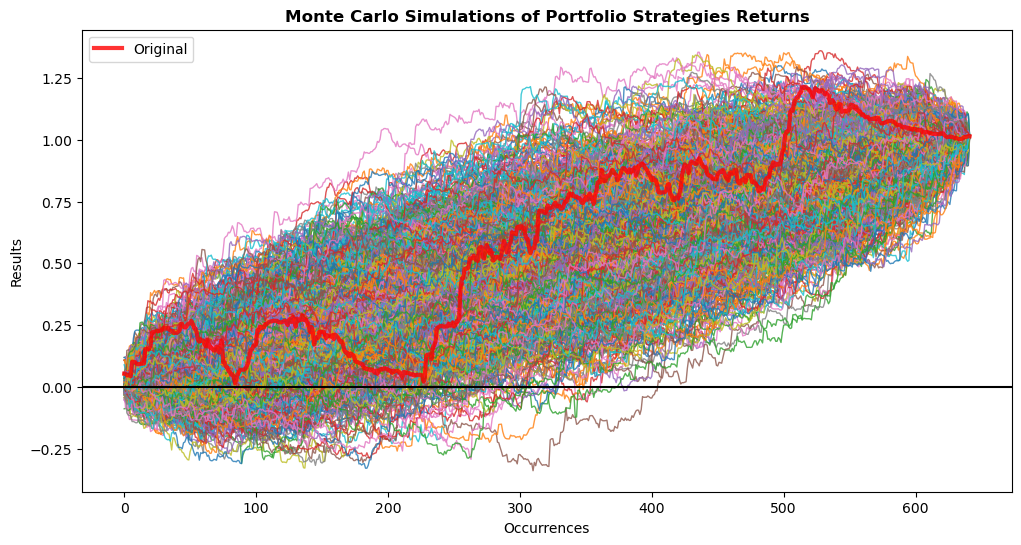

In [7]:
mc.plot(title="Monte Carlo Simulations of Portfolio Strategies Returns", figsize=(12, 6))

In [8]:
print(mc.stats)

{'min': np.float64(1.014688449999999), 'max': np.float64(1.0146884500000035), 'mean': np.float64(1.0146884500000013), 'median': np.float64(1.0146884500000013), 'std': np.float64(6.421414560629861e-16), 'maxdd': np.float64(-0.33987704999999935), 'bust': 0.199, 'goal': np.float64(0.801)}


In [9]:
print(mc.maxdd)

{'min': np.float64(-0.33987704999999935), 'max': np.float64(-2.2e-05), 'mean': np.float64(-0.06581916777652351), 'median': np.float64(-0.046604474999999854), 'std': np.float64(0.06318713123482576)}


In [10]:
mc.data.head()

,original,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.05,-0.01,0.00,0.00,0.00,0.02,-0.01,-0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.06,0.00,-0.00,-0.00,0.00,-0.00
1,-0.00,0.00,-0.00,0.01,-0.04,0.01,0.01,-0.03,0.01,0.01,...,0.00,0.00,0.00,0.01,0.01,-0.00,-0.01,-0.00,0.02,-0.00
2,-0.01,-0.04,0.00,0.01,0.02,-0.03,0.01,0.01,-0.01,0.00,...,-0.00,0.00,-0.01,0.01,-0.00,-0.00,-0.00,-0.01,-0.01,0.00
3,-0.00,-0.02,-0.00,0.02,-0.03,0.01,0.01,0.03,-0.01,0.02,...,0.00,-0.01,0.01,-0.01,-0.00,-0.00,0.00,-0.01,0.03,-0.01
4,0.00,0.00,0.00,0.02,0.00,-0.00,-0.00,-0.03,-0.01,-0.01,...,0.05,-0.01,-0.00,-0.01,-0.00,-0.01,-0.00,0.01,-0.01,0.00


In [11]:
mc.data.shape

(642, 1000)